In [67]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import pandas as pd

# Import the backtrader platform
import backtrader as bt


In [68]:
modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
datapath = os.path.join(modpath, '/home/tema/10X/Week9/Crypto_Trading_Engineering/data')

In [69]:
nvda = pd.read_csv('../data/NVDA.csv')
nvda.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-20,42.998001,43.990002,42.674000,43.807999,43.794888,451153000
1,2023-06-21,43.500999,43.615002,42.080002,43.044998,43.032116,551603000
2,2023-06-22,42.252998,43.425999,42.234001,43.025002,43.012127,417737000
3,2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
4,2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000


In [70]:
nvda.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [71]:
nvda['Date'] = pd.to_datetime(nvda['Date'])
nvda.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [72]:
start_date = nvda['Date'].min()
end_date = nvda['Date'].max()

start_date, end_date

(Timestamp('2023-06-20 00:00:00'), Timestamp('2024-06-18 00:00:00'))

In [73]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates

# Convert dates to Matplotlib date format
nvda['Date'] = nvda['Date'].apply(mdates.date2num)
ohlc = nvda[['Date', 'Open', 'High', 'Low', 'Close']].values.tolist()

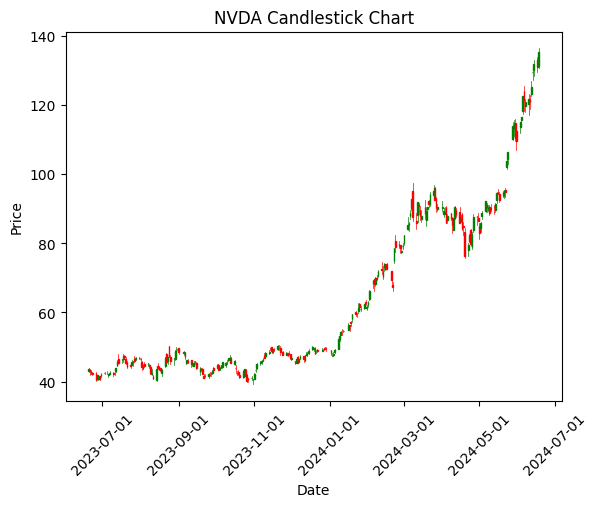

In [74]:
# Create a figure and axis
fig, ax = plt.subplots()

# Plot candlestick chart
candlestick_ohlc(ax, ohlc, width=0.6, colorup='g', colordown='r')

# Format x-axis as dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('NVDA Candlestick Chart')

# Display the plot
plt.show()


## Stratagys
simplified example where you buy at the Open price on each day and sell at the Close price

In [75]:
initial_capital = 100000  # Example initial capital in USD
position = 0  # No initial position
capital = initial_capital

for index, row in nvda.iterrows():
    if position == 0:  # Buy condition
        position = capital / row['Open']
        capital = 0
    elif position > 0:  # Sell condition
        capital = position * row['Close']
        position = 0

# Calculate final capital and returns
final_capital = capital
returns = (final_capital - initial_capital) / initial_capital * 100

print(f'Initial Capital: ${initial_capital:.2f}')
print(f'Final Capital: ${final_capital:.2f}')
print(f'Returns: {returns:.2f}%')


Initial Capital: $100000.00
Final Capital: $190812.86
Returns: 90.81%


In [77]:
import sys
sys.path.insert(0, '../')  # Adjust the path as needed

import backtrader as bt

from backtest import backtrader_script

# Import the backtrader strategy from your script
from backtrader_script import InitialStrategy

Starting Portfolio Value: 100000.00
2023-06-20, Close, 43.79
2023-06-20, BUY CREATE, 43.79
2023-06-21, BUY EXECUTED, 43.49
2023-06-21, Close, 43.03
2023-06-22, Close, 43.01
2023-06-23, Close, 42.20
2023-06-26, Close, 40.62
2023-06-27, Close, 41.86
2023-06-28, Close, 41.10
2023-06-28, SELL CREATE, 41.10
2023-06-29, SELL EXECUTED, 41.55
2023-06-29, Close, 40.81
2023-06-29, BUY CREATE, 40.81
2023-06-30, BUY EXECUTED, 41.67
2023-06-30, Close, 42.29
2023-07-03, Close, 42.40
2023-07-05, Close, 42.30
2023-07-06, Close, 42.09
2023-07-07, Close, 42.49
2023-07-10, Close, 42.17
2023-07-10, SELL CREATE, 42.17
2023-07-11, SELL EXECUTED, 42.47
2023-07-11, Close, 42.39
2023-07-12, Close, 43.89
2023-07-13, Close, 45.96
2023-07-14, Close, 45.46
2023-07-17, Close, 46.45
2023-07-18, Close, 47.48
2023-07-19, Close, 47.06
2023-07-20, Close, 45.51
2023-07-20, BUY CREATE, 45.51
2023-07-21, BUY EXECUTED, 45.77
2023-07-21, Close, 44.30
2023-07-24, Close, 44.60
2023-07-25, Close, 45.67
2023-07-26, Close, 45.44


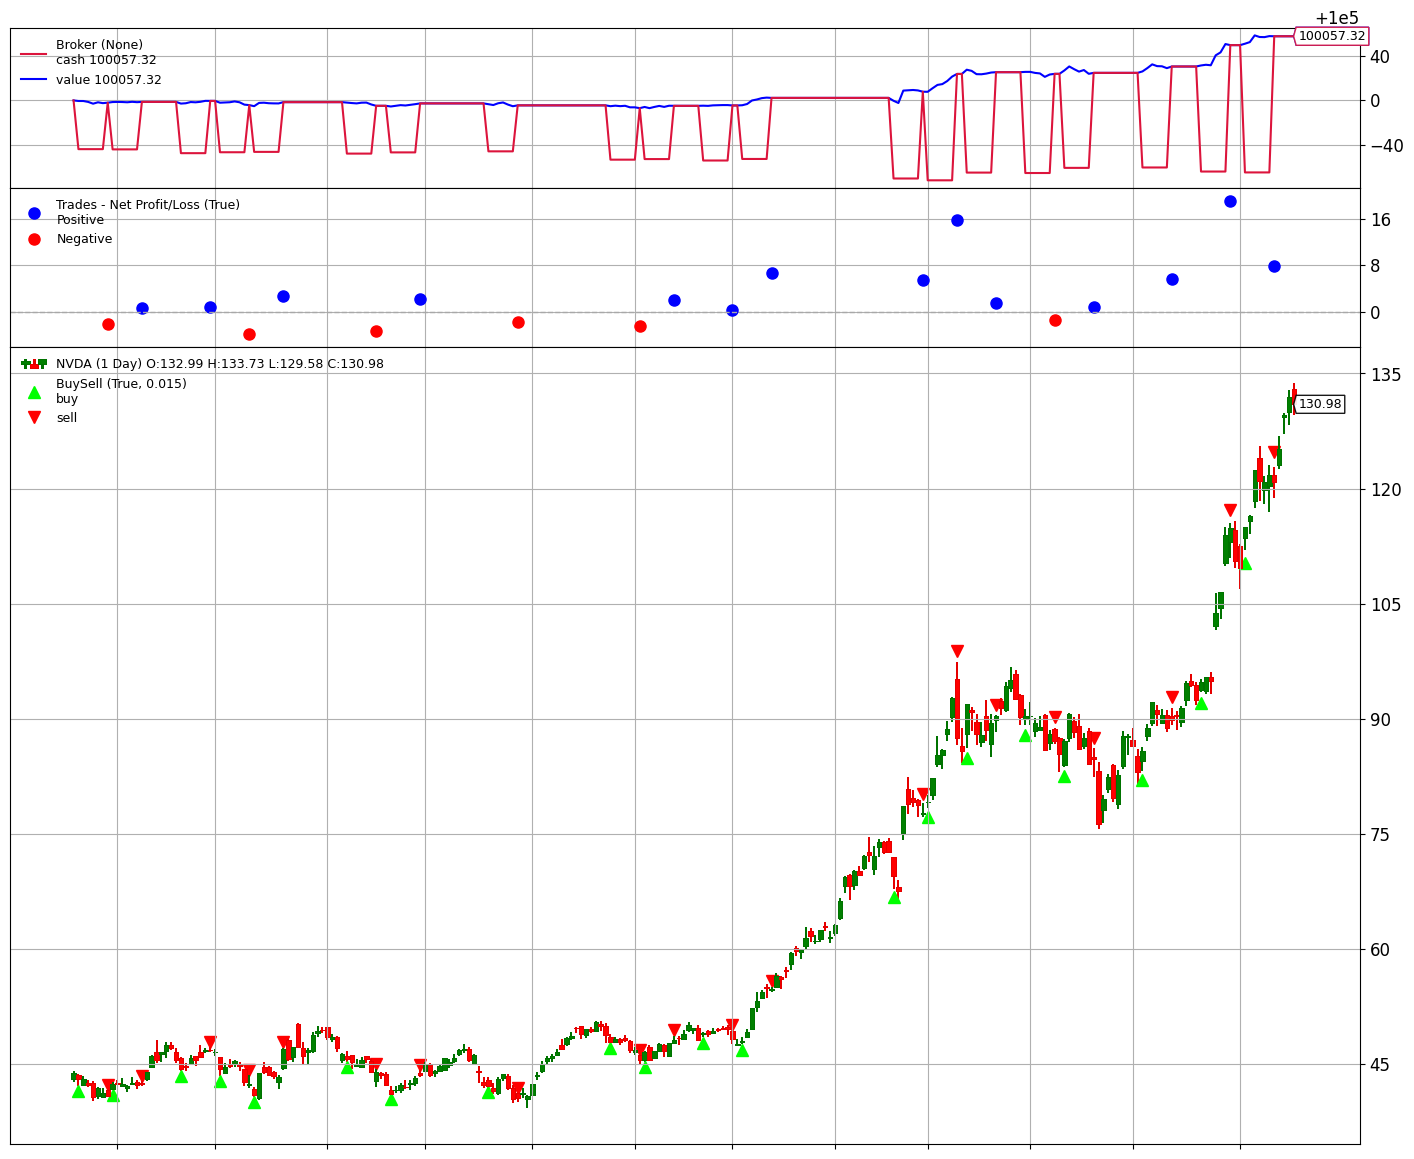

In [90]:

# Create a function to run backtest and visualize results
def run_backtest(strategy_class, data_path):
    cerebro = bt.Cerebro()
    cerebro.addstrategy(strategy_class)

    data = bt.feeds.YahooFinanceCSVData(
        dataname=data_path,
        fromdate=datetime.datetime(2023, 6, 20),
        todate=datetime.datetime(2024, 6, 18),
        reverse=False)

    cerebro.adddata(data)
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.001)

    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    cerebro.run()

    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Adjust plot settings
    plt.rcParams['figure.figsize'] = [15, 12]
    plt.rcParams.update({'font.size': 12})

    # Plot the results
    cerebro.plot(iplot=False, volume=False, style='candlestick', fmt_x_ticks='%Y-%m-%d')

    return cerebro

# Example usage
cerebro_instance = run_backtest(InitialStrategy, '../data/NVDA.csv')


In [ ]:
run_backtest(InitialStrategy, '../data/NVDA.csv')
#cerebro_instance = run_backtest(InitialStrategy, '../data/NVDA.csv')